In [1]:
import numpy as np
from sklearn import svm

## Tratamento para N3 e S3 que tem dimensões diferentes

In [102]:
import numpy as np

# Carregar os dados de treinamento normais
n1 = np.loadtxt("n1.dat")
n2 = np.loadtxt("n2.dat")
n4 = np.loadtxt("n4.dat")
n5 = np.loadtxt("n5.dat")

# Carregar os dados de treinamento epilépticos
s1 = np.loadtxt("s1.dat")
s2 = np.loadtxt("s2.dat")
s4 = np.loadtxt("s4.dat")
s5 = np.loadtxt("s5.dat")

# Carregar os dados n3.dat e s3.dat
n3 = np.loadtxt("n3.dat")
s3 = np.loadtxt("s3.dat")

# Verificar as dimensões atuais dos dados
print("Dimensão original de n3.dat:", n3.shape)
print("Dimensão original de s3.dat:", s3.shape)

# Dimensões desejadas
desired_shape = (24, 5120)

# Verificar a diferença de dimensões
diff_shape_n3 = desired_shape[1] - n3.shape[1]
diff_shape_s3 = desired_shape[1] - s3.shape[1]

# Realizar o padding, se necessário
if diff_shape_n3 > 0:
    n3_padded = np.pad(n3, ((0, 0), (0, diff_shape_n3)), mode='constant')
else:
    n3_padded = n3[:, :desired_shape[1]]

if diff_shape_s3 > 0:
    s3_padded = np.pad(s3, ((0, 0), (0, diff_shape_s3)), mode='constant')
else:
    s3_padded = s3[:, :desired_shape[1]]

# Verificar as novas dimensões dos dados
print("Nova dimensão de n3.dat:", n3_padded.shape)
print("Nova dimensão de s3.dat:", s3_padded.shape)

Dimensão original de n3.dat: (24, 6145)
Dimensão original de s3.dat: (24, 6145)
Nova dimensão de n3.dat: (24, 5120)
Nova dimensão de s3.dat: (24, 5120)


In [103]:
np.savetxt("n3_padded.dat", n3_padded)
np.savetxt("s3_padded.dat", s3_padded)

## Analise dos Dados

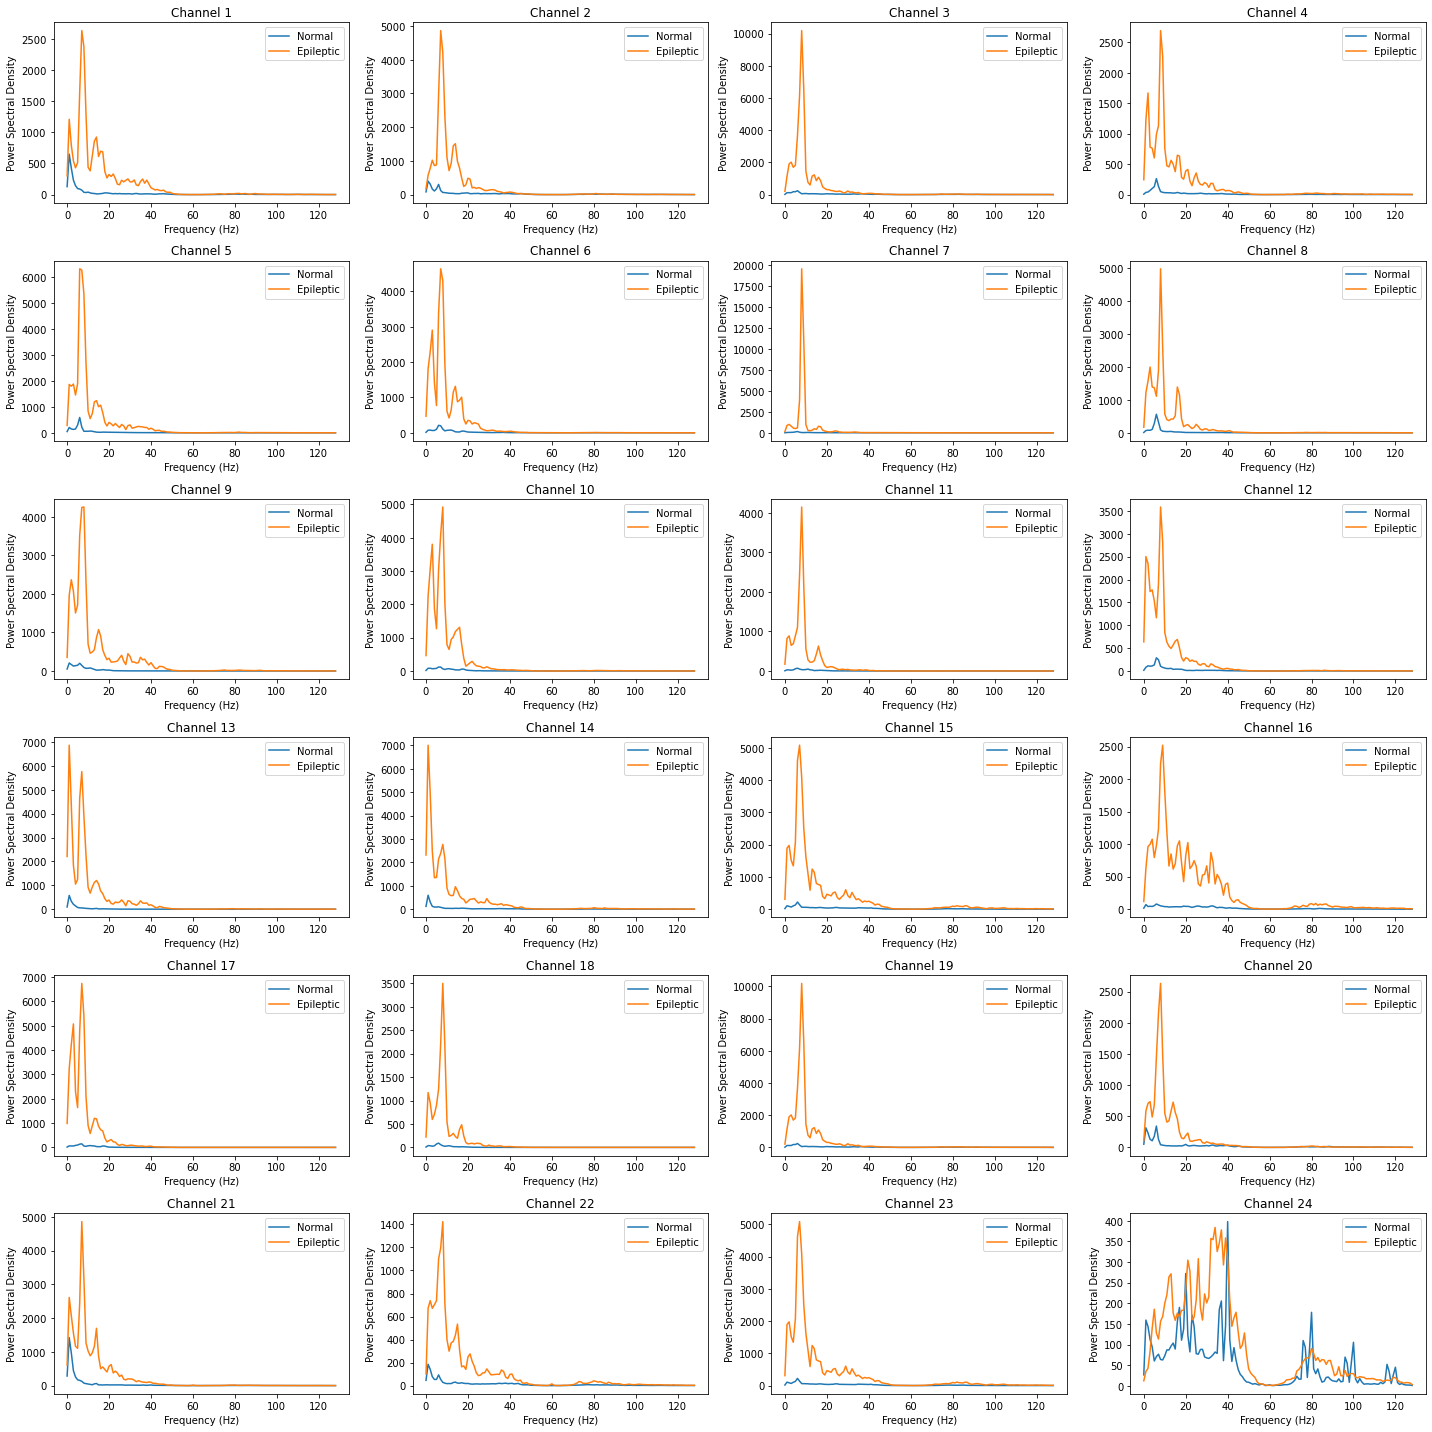

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Carregar os dados de treinamento normais
n1 = np.loadtxt("n1.dat")
n2 = np.loadtxt("n2.dat")
#n3 = np.loadtxt("n3_padded.dat")
n4 = np.loadtxt("n4.dat")
n5 = np.loadtxt("n5.dat")

# Carregar os dados de treinamento epilépticos
s1 = np.loadtxt("s1.dat")
s2 = np.loadtxt("s2.dat")
#s3 = np.loadtxt("s3_padded.dat")
s4 = np.loadtxt("s4.dat")
s5 = np.loadtxt("s5.dat")

# Definir os parâmetros
sampling_rate = 256
n_channels = 24

# Calcular o PSD para os dados normais
frequencies_n, psd_n = signal.welch(np.concatenate((n1, n2, n4, n5)), fs=sampling_rate, nperseg=256)

# Calcular o PSD para os dados epilépticos
frequencies_s, psd_s = signal.welch(np.concatenate((s1, s2, s4, s5)), fs=sampling_rate, nperseg=256)

# Plotar o PSD
plt.figure(figsize=(20, 20))
for channel in range(n_channels):
    plt.subplot(6, 4, channel+1)
    plt.plot(frequencies_n, psd_n[channel], label='Normal')
    plt.plot(frequencies_s, psd_s[channel], label='Epileptic')
    plt.title('Channel {}'.format(channel+1))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density')
    plt.legend()
plt.tight_layout()
plt.savefig("fig_normal_ep.png")
plt.show()


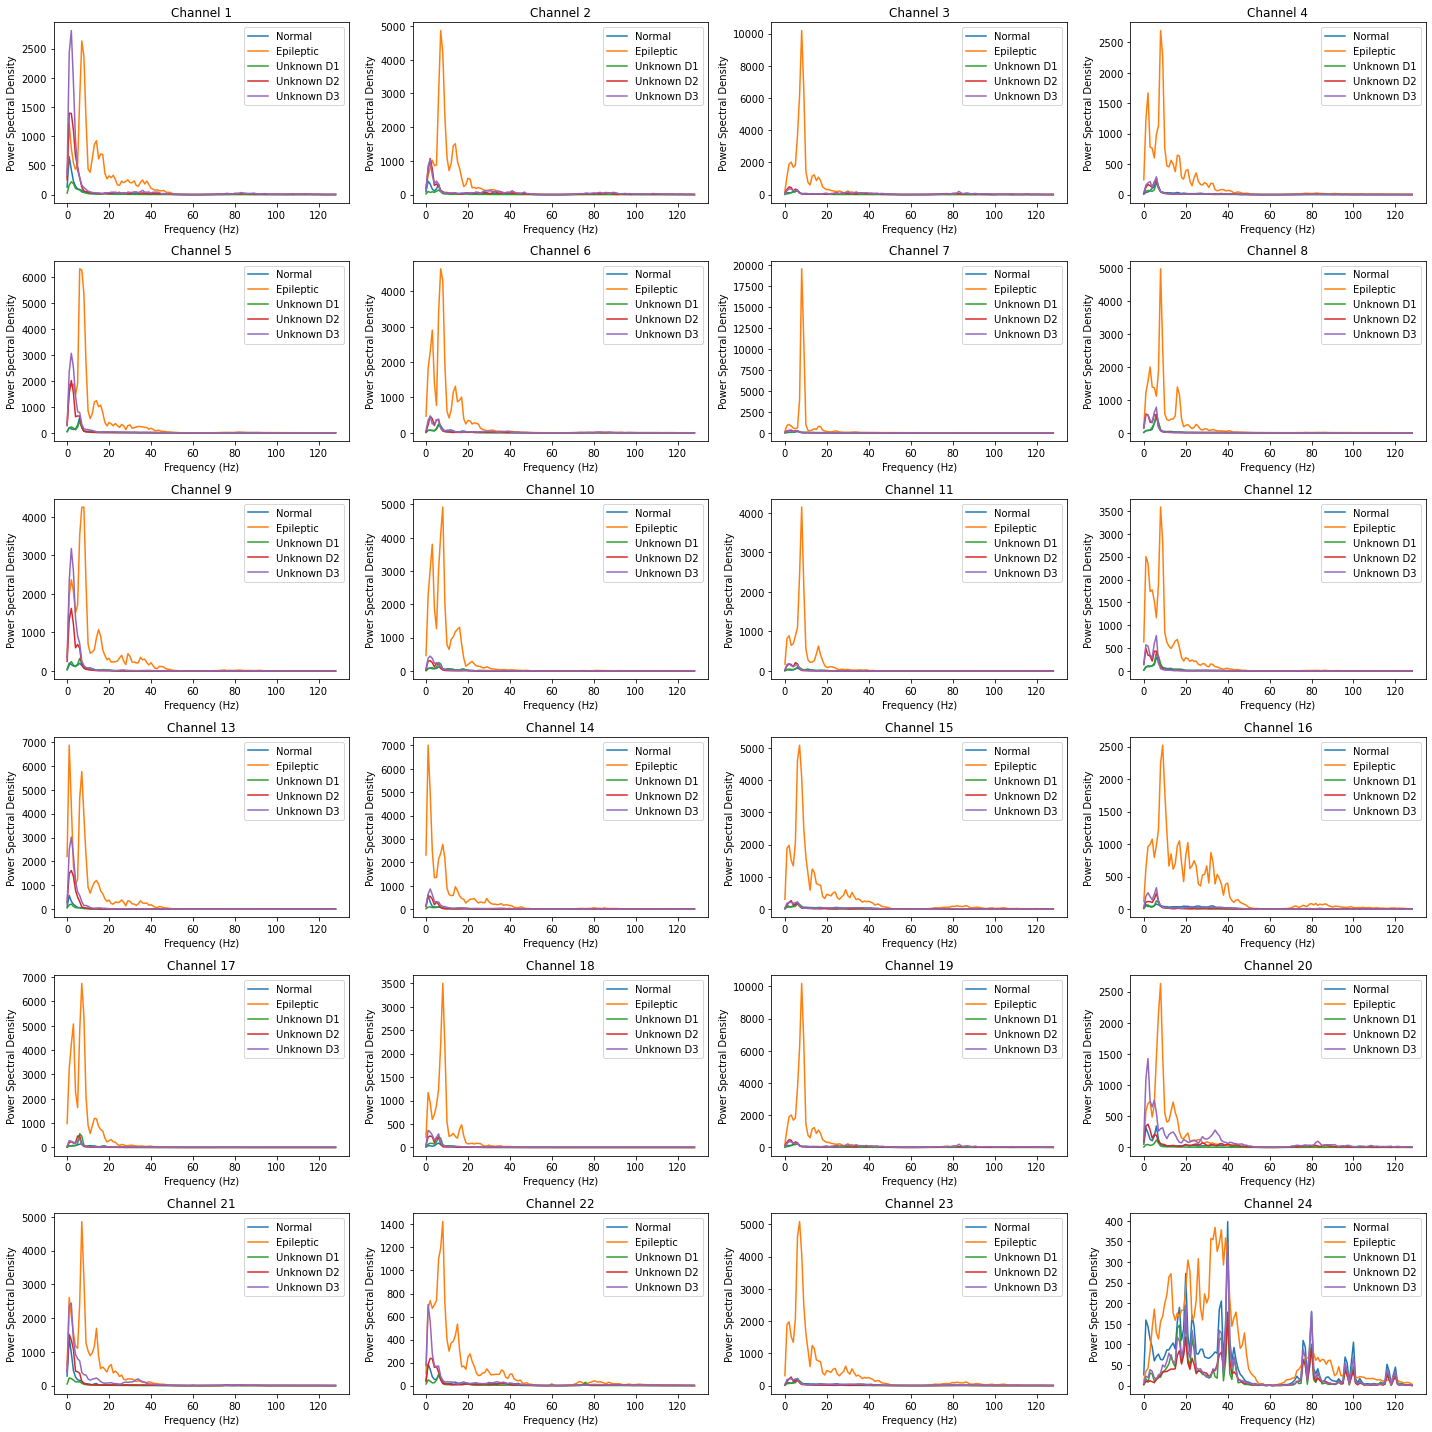

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Carregar os dados de treinamento normais
n1 = np.loadtxt("n1.dat")
n2 = np.loadtxt("n2.dat")
n4 = np.loadtxt("n4.dat")
n5 = np.loadtxt("n5.dat")

# Carregar os dados de treinamento epilépticos
s1 = np.loadtxt("s1.dat")
s2 = np.loadtxt("s2.dat")
s4 = np.loadtxt("s4.dat")
s5 = np.loadtxt("s5.dat")

# Carregar os dados desconhecidos
d1 = np.loadtxt("d1.dat")
d2 = np.loadtxt("d2.dat")
d3 = np.loadtxt("d3.dat")

# Definir os parâmetros
sampling_rate = 256
n_channels = 24

# Calcular o PSD para os dados normais
frequencies_n, psd_n = signal.welch(np.concatenate((n1, n2, n4, n5)), fs=sampling_rate, nperseg=256)

# Calcular o PSD para os dados epilépticos
frequencies_s, psd_s = signal.welch(np.concatenate((s1, s2, s4, s5)), fs=sampling_rate, nperseg=256)

# Calcular o PSD para os dados desconhecidos
frequencies_d1, psd_d1 = signal.welch(d1, fs=sampling_rate, nperseg=256)
frequencies_d2, psd_d2 = signal.welch(d2, fs=sampling_rate, nperseg=256)
frequencies_d3, psd_d3 = signal.welch(d3, fs=sampling_rate, nperseg=256)

# Plotar o PSD
plt.figure(figsize=(20, 20))
for channel in range(n_channels):
    plt.subplot(6, 4, channel+1)
    plt.plot(frequencies_n, psd_n[channel], label='Normal')
    plt.plot(frequencies_s, psd_s[channel], label='Epileptic')
    plt.plot(frequencies_d1, psd_d1[channel], label='Unknown D1')
    plt.plot(frequencies_d2, psd_d2[channel], label='Unknown D2')
    plt.plot(frequencies_d3, psd_d3[channel], label='Unknown D3')
    plt.title('Channel {}'.format(channel+1))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density')
    plt.legend()
plt.tight_layout()
plt.savefig("fig_com_desc_label.png")
plt.show()


## SVM

In [117]:
import numpy as np
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregar os dados de treinamento normais
n1 = np.loadtxt("n1.dat")
n2 = np.loadtxt("n2.dat")
# n3 = np.loadtxt("n3_padded.dat")
n4 = np.loadtxt("n4.dat")
n5 = np.loadtxt("n5.dat")

# Carregar os dados de treinamento epilépticos
s1 = np.loadtxt("s1.dat")
s2 = np.loadtxt("s2.dat")
# s3 = np.loadtxt("s3_padded.dat")
s4 = np.loadtxt("s4.dat")
s5 = np.loadtxt("s5.dat")

# Criar os rótulos para os dados de treinamento
y_normal = np.zeros(len(n1) + len(n2) + len(n4) + len(n5))
y_epileptic = np.ones(len(s1) + len(s2) + len(s4) + len(s5))

# Concatenar os dados de treinamento
X_train = np.concatenate((n1, n2, n4, n5, s1, s2, s4, s5))
y_train = np.concatenate((y_normal, y_epileptic))

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Criar o classificador SVM
clf = svm.SVC()

# Treinar o classificador SVM
clf.fit(X_train, y_train)

# Carregar os dados desconhecidos
d1 = np.loadtxt("d1.dat")
d2 = np.loadtxt("d2.dat")
d3 = np.loadtxt("d3.dat")

# Realizar a classificação dos dados desconhecidos
pred1 = clf.predict(d1)
pred2 = clf.predict(d2)
pred3 = clf.predict(d3)

# Imprimir as previsões
list_pred1_svm = []
for value in pred1:
    if value == 0:
        list_pred1_svm.append("normal")
    else:
        list_pred1_svm.append("epileptico")
list_pred2_svm = []
for value in pred2:
    if value == 0:
        list_pred2_svm.append("normal")
    else:
        list_pred2_svm.append("epileptico")
list_pred3_svm = []
for value in pred3:
    if value == 0:
        list_pred3_svm.append("normal")
    else:
        list_pred3_svm.append("epileptico")

# Converter as previsões em valores numéricos (0 para normal e 1 para epiléptico)
list_pred1_svm = pred1.tolist()
list_pred2_svm = pred2.tolist()
list_pred3_svm = pred3.tolist()

# Criar DataFrame para comparar as previsões
df = pd.DataFrame({
    'Prediction_D1': list_pred1_svm,
    'Prediction_D2': list_pred2_svm,
    'Prediction_D3': list_pred3_svm
})

# Mapear os valores numéricos de volta para as strings 'normal' e 'epiléptico'
df.replace({0: 'normal', 1: 'epiléptico'}, inplace=True)

# Avaliar o desempenho do modelo nos dados de teste
accuracy = clf.score(X_test, y_test)
print("Acurácia no conjunto de teste:", accuracy)

# Exibir DataFrame
df


Acurácia no conjunto de teste: 0.7948717948717948


,Prediction_D1,Prediction_D2,Prediction_D3
0,normal,normal,epiléptico
1,normal,normal,normal
2,normal,normal,normal
3,normal,normal,normal
4,normal,epiléptico,epiléptico
5,normal,normal,normal
6,normal,normal,normal
7,normal,normal,normal
8,normal,normal,epiléptico
9,normal,normal,normal


### NCCD

In [119]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Carregar os dados de treinamento normais
n1 = np.loadtxt("n1.dat")
n2 = np.loadtxt("n2.dat")
#n3 = np.loadtxt("n3.dat")
n4 = np.loadtxt("n4.dat")
n5 = np.loadtxt("n5.dat")

# Carregar os dados de treinamento epilépticos
s1 = np.loadtxt("s1.dat")
s2 = np.loadtxt("s2.dat")
#s3 = np.loadtxt("s3.dat")
s4 = np.loadtxt("s4.dat")
s5 = np.loadtxt("s5.dat")

# Criar os rótulos para os dados de treinamento
y_normal = np.zeros(len(n1) + len(n2) + len(n4) + len(n5))
y_epileptic = np.ones(len(s1) + len(s2) + len(s4) + len(s5))

# Concatenar os dados de treinamento
X = np.concatenate((n1, n2, n4, n5, s1, s2, s4, s5))
y = np.concatenate((y_normal, y_epileptic))

# Realizar o agrupamento dos dados não convulsivos
k = 3  # Número de clusters (pode ser ajustado)
kmeans = KMeans(n_clusters=k)
non_epileptic_data = np.concatenate((n1, n2, n4, n5))
kmeans.fit(non_epileptic_data)
non_epileptic_centroids = kmeans.cluster_centers_

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o classificador SVM
clf = svm.SVC()

# Treinar o classificador SVM
clf.fit(X_train, y_train)

# Carregar os dados desconhecidos
d1 = np.loadtxt("d1.dat")
d2 = np.loadtxt("d2.dat")
d3 = np.loadtxt("d3.dat")

# Calcular as distâncias aos centroides não convulsivos
distances_d1 = cdist(d1, non_epileptic_centroids, 'euclidean')
distances_d2 = cdist(d2, non_epileptic_centroids, 'euclidean')
distances_d3 = cdist(d3, non_epileptic_centroids, 'euclidean')

# Realizar a classificação dos dados desconhecidos
pred1 = clf.predict(d1)
pred2 = clf.predict(d2)
pred3 = clf.predict(d3)

print("pred1", pred1)
print("pred2", pred2)
print("pred3", pred3)

# Imprimir as previsões
list_pred1_nccd = []
for value in pred1:
    if value == 0:
        list_pred1_nccd.append("normal")
    else:
        list_pred1_nccd.append("epileptico")
list_pred2_nccd = []
for value in pred2:
    if value == 0:
        list_pred2_nccd.append("normal")
    else:
        list_pred2_nccd.append("epileptico")
list_pred3_nccd = []
for value in pred3:
    if value == 0:
        list_pred3_nccd.append("normal")
    else:
        list_pred3_nccd.append("epileptico")
        
# Converter as previsões em valores numéricos (0 para normal e 1 para epiléptico)
list_pred1_nccd = pred1.tolist()
list_pred2_nccd = pred2.tolist()
list_pred3_nccd = pred3.tolist()

# Criar DataFrame para comparar as previsões
df = pd.DataFrame({
    'Prediction_D1': list_pred1_nccd,
    'Prediction_D2': list_pred2_nccd,
    'Prediction_D3': list_pred3_nccd
})

# Mapear os valores numéricos de volta para as strings 'normal' e 'epiléptico'
df.replace({0: 'normal', 1: 'epiléptico'}, inplace=True)

# Avaliar o desempenho do modelo nos dados de teste
accuracy = clf.score(X_test, y_test)
print("Acurácia no conjunto de teste:", accuracy)

df


pred1 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
pred2 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
pred3 [1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
Acurácia no conjunto de teste: 0.7948717948717948


,Prediction_D1,Prediction_D2,Prediction_D3
0,normal,normal,epiléptico
1,normal,normal,normal
2,normal,normal,normal
3,normal,normal,normal
4,normal,epiléptico,epiléptico
5,normal,normal,normal
6,normal,normal,normal
7,normal,normal,normal
8,normal,normal,epiléptico
9,normal,normal,normal


## DCC

In [120]:
import numpy as np
from sklearn import svm
from scipy.spatial.distance import cdist

# Carregar os dados de treinamento normais
n1 = np.loadtxt("n1.dat")
n2 = np.loadtxt("n2.dat")
#n3 = np.loadtxt("n3.dat")
n4 = np.loadtxt("n4.dat")
n5 = np.loadtxt("n5.dat")

# Carregar os dados de treinamento epilépticos
s1 = np.loadtxt("s1.dat")
s2 = np.loadtxt("s2.dat")
#s3 = np.loadtxt("s3.dat")
s4 = np.loadtxt("s4.dat")
s5 = np.loadtxt("s5.dat")

# Criar os rótulos para os dados de treinamento
y_normal = np.zeros(len(n1) + len(n2) + len(n4) + len(n5))
y_epileptic = np.ones(len(s1) + len(s2) + len(s4) + len(s5))

# Concatenar os dados de treinamento
X_train = np.concatenate((n1, n2, n4, n5, s1, s2, s4, s5))
y_train = np.concatenate((y_normal, y_epileptic))

# Realizar o agrupamento dos dados não convulsivos
k = 3  # Número de clusters (pode ser ajustado)
kmeans = KMeans(n_clusters=k)
epileptic_data = np.concatenate((s1, s2, s4, s5))
kmeans.fit(epileptic_data)
epileptic_centroids = kmeans.cluster_centers_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o classificador SVM
clf = svm.SVC()

# Treinar o classificador SVM
clf.fit(X_train, y_train)

# Carregar os dados desconhecidos
d1 = np.loadtxt("d1.dat")
d2 = np.loadtxt("d2.dat")
d3 = np.loadtxt("d3.dat")

# Calcular as distâncias aos centroides não convulsivos
distances_d1 = cdist(d1, epileptic_centroids, 'euclidean')
distances_d2 = cdist(d2, epileptic_centroids, 'euclidean')
distances_d3 = cdist(d3, epileptic_centroids, 'euclidean')

# Realizar a classificação dos dados desconhecidos
pred1 = clf.predict(d1)
pred2 = clf.predict(d2)
pred3 = clf.predict(d3)

print("pred1", pred1)
print("pred2", pred2)
print("pred3", pred3)
# Imprimir as previsões
list_pred1_dcc = []
for value in pred1:
    if value == 0:
        list_pred1_dcc.append("normal")
    else:
        list_pred1_dcc.append("epileptico")
list_pred2_dcc = []
for value in pred2:
    if value == 0:
        list_pred2_dcc.append("normal")
    else:
        list_pred2_dcc.append("epileptico")
list_pred3_dcc = []
for value in pred3:
    if value == 0:
        list_pred3_dcc.append("normal")
    else:
        list_pred3_dcc.append("epileptico")
        
# Converter as previsões em valores numéricos (0 para normal e 1 para epiléptico)
list_pred1_dcc = pred1.tolist()
list_pred2_dcc = pred2.tolist()
list_pred3_dcc = pred3.tolist()

# Criar DataFrame para comparar as previsões
df = pd.DataFrame({
    'Prediction_D1': list_pred1_dcc,
    'Prediction_D2': list_pred2_dcc,
    'Prediction_D3': list_pred3_dcc
})

# Mapear os valores numéricos de volta para as strings 'normal' e 'epiléptico'
df.replace({0: 'normal', 1: 'epiléptico'}, inplace=True)

# Avaliar o desempenho do modelo nos dados de teste
accuracy = clf.score(X_test, y_test)
print("Acurácia no conjunto de teste:", accuracy)

df


pred1 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
pred2 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
pred3 [1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
Acurácia no conjunto de teste: 0.7948717948717948


,Prediction_D1,Prediction_D2,Prediction_D3
0,normal,normal,epiléptico
1,normal,normal,normal
2,normal,normal,normal
3,normal,normal,normal
4,normal,epiléptico,epiléptico
5,normal,normal,normal
6,normal,normal,normal
7,normal,normal,normal
8,normal,normal,epiléptico
9,normal,normal,normal


## Results

In [121]:
import pandas as pd
df = pd.DataFrame({
    'SVM_Prediction_1': list_pred1_svm,
    'DCC_Prediction_1': list_pred1_dcc,
    'NCCD_Prediction_1': list_pred1_nccd,
    "blank1": "|",
    'SVM_Prediction_2': list_pred2_svm,
    'DCC_Prediction_2': list_pred2_dcc,
    'NCCD_Prediction_2': list_pred2_nccd,
    "blank2": "|",
    'SVM_Prediction_3': list_pred3_svm,
    'DCC_Prediction_3': list_pred3_dcc,
    'NCCD_Prediction_3': list_pred3_nccd
})
df

,SVM_Prediction_1,DCC_Prediction_1,NCCD_Prediction_1,blank1,SVM_Prediction_2,DCC_Prediction_2,NCCD_Prediction_2,blank2,SVM_Prediction_3,DCC_Prediction_3,NCCD_Prediction_3
0,0.0,0.0,0.0,|,0.0,0.0,0.0,|,1.0,1.0,1.0
1,0.0,0.0,0.0,|,0.0,0.0,0.0,|,0.0,0.0,0.0
2,0.0,0.0,0.0,|,0.0,0.0,0.0,|,0.0,0.0,0.0
3,0.0,0.0,0.0,|,0.0,0.0,0.0,|,0.0,0.0,0.0
4,0.0,0.0,0.0,|,1.0,1.0,1.0,|,1.0,1.0,1.0
5,0.0,0.0,0.0,|,0.0,0.0,0.0,|,0.0,0.0,0.0
6,0.0,0.0,0.0,|,0.0,0.0,0.0,|,0.0,0.0,0.0
7,0.0,0.0,0.0,|,0.0,0.0,0.0,|,0.0,0.0,0.0
8,0.0,0.0,0.0,|,0.0,0.0,0.0,|,1.0,1.0,1.0
9,0.0,0.0,0.0,|,0.0,0.0,0.0,|,0.0,0.0,0.0
